In [1]:
import sys
# print sys.modules
try:
    del sys.modules['scholarly']
except KeyError:
    print "module not found"

module not found


In [2]:
sys.path.append("scholarly/")
import scholarly
from collections import defaultdict
from matplotlib import pyplot as plt

In [3]:
author = scholarly.search_author("Julian Hough")

In [4]:
author = next(author).fill()

<div class="gsc_1usr"><div class="gs_ai gs_scl gs_ai_chpr"><a class="gs_ai_pho" href="/citations?hl=en&amp;user=PYUqCywAAAAJ"><span class="gs_rimg gs_pp_sm"><img alt="Julian Hough" height="56" sizes="56px" src="https://scholar.googleusercontent.com/citations?view_op=small_photo&amp;user=PYUqCywAAAAJ&amp;citpid=13" srcset="https://scholar.googleusercontent.com/citations?view_op=small_photo&amp;user=PYUqCywAAAAJ&amp;citpid=13 56w,https://scholar.googleusercontent.com/citations?view_op=view_photo&amp;user=PYUqCywAAAAJ&amp;citpid=13 128w" width="56"/></span></a><div class="gs_ai_t"><h3 class="gs_ai_name"><a href="/citations?hl=en&amp;user=PYUqCywAAAAJ"><span class="gs_hlt">Julian Hough</span></a></h3><div class="gs_ai_aff">Queen Mary University of London</div><div class="gs_ai_eml">Verified email at qmul.ac.uk</div><div class="gs_ai_cby">Cited by 900</div><div class="gs_ai_int"><a class="gs_ai_one_int" href="/citations?hl=en&amp;view_op=search_authors&amp;mauthors=label:dialogue">Dialogue<

In [5]:
graph = []
years = []
for year, cites in sorted(author.cites_per_year.items()):
    if True:
        if year == 2013:
            cites = cites - 66
        elif year == 2016:
            cites = cites - ( 145 )
        elif year == 2017:
            cites = cites - ( 155  - 2)
    print year, cites
    graph.append(cites)

2011 5
2012 10
2013 13
2014 31
2015 41
2016 91
2017 146
2018 117
2019 75


In [6]:
sum(graph)

529

In [7]:
def h_score(citations):
    h = 0
    for i, s in enumerate(sorted(citations, reverse=True)):
        if s < (i + 1):
            break
        h = i +1
            
    return h

def i_score(citations):
    return len(filter( lambda x: x>=10, citations))

In [8]:
# for pub in author.publications:
#    print type(pub), hasattr(pub, 'citedby')

In [9]:
# 2013 BBS abstract cited articles 33 too many
# 2016 BBS abstract cited artciles 29 too many
# 2017 BBS asbtract cited articles 31 too many
penalties = {
    'Incremental semantic construction in a dialogue system' : 93,
   
    'Feedback in conversation as incremental semantic update' : 60,
    'Incremental grammar induction from child-directed dialogue utterances' : 60,

    'Modelling Incremental Self-Repair Processing in Dialogue.' : 31,
    'Incremental semantics driven natural language generation with self-repairing capability' : 33,
    'Processing self-repairs in an incremental type-theoretic dialogue system' :  29,
    'Modelling expectation in the self-repair processing of annotat-, um, listeners' : 29,
    'Probabilistic record type lattices for incremental reference processing' : 31,
    'Recurrent neural networks for incremental disfluency detection' : 0,#-2
    
    'On making syntax dynamic' : 60,
    'Finishing each other’s... Responding to incomplete contributions in dialogue'.decode('utf-8') : 33,
    'Incrementality and intention-recognition in utterance processing.' : 93,
}

papers = []
years_new = defaultdict(list)
citations = []
for pub in author.publications:
    year = 2018 if not pub.bib.get('year') else pub.bib['year']
    cites = 0 if not hasattr(pub, 'citedby') else pub.citedby
    
    if pub.bib['title'] in penalties.keys():
        cites = cites - penalties[pub.bib['title']]
    papers.append(cites)
    years_new[year].append(cites)
    # print pub.bib['title'], cites
    citations.append((pub.bib['title'], cites, year))
print sum(papers),  "citations from", len(papers), "papers"
print "h", h_score(papers)
print "i", i_score(papers)

534 citations from 67 papers
h 14
i 21


1 Incremental semantic construction in a dialogue system 2011 : 61
2 Feedback in conversation as incremental semantic update 2015 : 46
3 Modelling Incremental Self-Repair Processing in Dialogue. 2015 : 32
4 Dylan: Parser for dynamic syntax 2011 : 29
5 Conversational interactions: Capturing dialogue dynamics 2012 : 25
6 Strongly incremental repair detection 2014 : 20
7 Incremental grammar induction from child-directed dialogue utterances 2013 : 18
8 Recurrent neural networks for incremental disfluency detection 2015 : 18
9 Probabilistic type theory for incremental dialogue processing 2014 : 18
10 PentoRef: A corpus of spoken references in task-oriented dialogues 2016 : 17
11 Recognising conversational speech: What an incremental asr should do f 2017 : 16
12 Processing self-repairs in an incremental type-theoretic dialogue syst 2012 : 15
13 Towards Deep End-of-Turn Prediction for Situated Spoken Dialogue Syste 2017 : 14
14 A multimodal system for real-time action instruction in motor ski

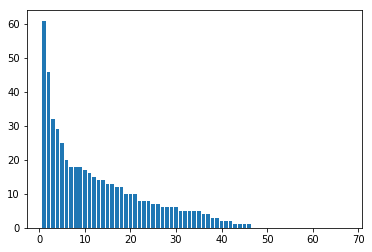

In [10]:
count = 0
pub_data = []
for x,y,z in sorted(citations, key=lambda x:x[1], reverse=True):
   # if z <2014: continue
    count+=1
    print count, x[:70],z, ":", y
    pub_data.append(y)
    #x, y, z = s
    #print "\t".join([str(i+1), x[:13], str(y), str(z)])
plt.bar(range(1, len(pub_data)+1),pub_data)
plt.show()

[5, 10, 13, 31, 41, 91, 146, 117, 75]


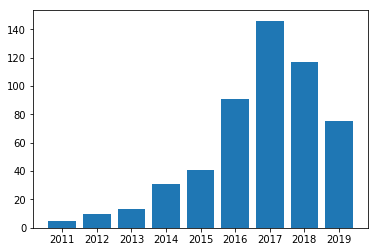

In [11]:
#graph[-1] = 150
print graph
x = range(2020-len(graph),2020)
plt.bar(x,graph)
#plt.plot(graph)

plt.xticks(x, x)
plt.savefig("citations.png")
plt.show()
